Notebook with example non linear data set

In [183]:
from explainability_confirmation.examine_explanation import examine_interpretation
from explainability_confirmation.examine_explanation import examine_local_fidelity
from explainability_confirmation.examine_explanation import get_lipschitz
from explainability_confirmation.examine_explanation import gradual_elimination
from explainability_confirmation.examine_explanation import create_intermediate_points

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [165]:
import eli5
from eli5.sklearn import PermutationImportance

In [4]:
from sklearn.datasets import make_classification
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn import preprocessing
import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import lime

# Create data set

In [191]:
x1 = 0.1*np.random.normal(size=100)+0.5
y1 = np.random.random(100)
l1 = [int(i>0.5) for i in x1]
df1 = pd.DataFrame(data={'x':x1, 'y':y1, 'label':l1})

x2=-1*np.random.random(100)
y2=-0.1*np.random.normal(size=100)-0.5
l2 = [int(i>-0.5) for i in y2]
df2 = pd.DataFrame(data={'x':x2, 'y':y2, 'label':l2})

df = df1.append(df2)

(-1, 1.2)

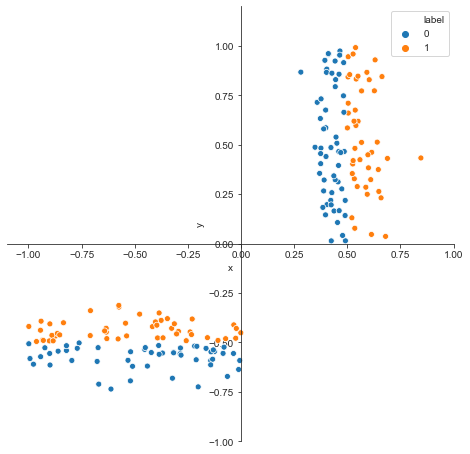

In [437]:
fig = plt.figure(figsize=(8,8))

# plt.figsize(12,12)
ax = sns.scatterplot('x', 'y', hue='label', data=df)

# ax.grid(True)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

# handles, labels = ax.get_legend_handles_labels()
# plt.legend(handles[::-1], labels[::-1])
# plt.legend(['0', '1'])
# sns.lineplot([-1.1, 0], [-0.5, -0.5])
# sns.lineplot([0.5, 0.5], [1.2, 0])

# legend1 = ax.legend(*scatter.legend_elements(),
#                     loc="lower left", title="Classes")
# ax.add_artist(legend1)

plt.xlim(-1.1, 1)
plt.ylim(-1, 1.2)

# Try 2

In [269]:
np.random.choice([0,1])

1

In [277]:
y2_1

[0.14754703469752886,
 0.38623692127857123,
 -0.008739512570345151,
 0.010849011449878654,
 0.09592461900610133,
 0.42017388334149275,
 0.30215232954924376,
 0.11049708062665542,
 0.20509421102731426,
 0.4326141254848851,
 0.018297571037174637,
 0.17978189620752322,
 0.18239732736551706]

In [328]:
y2_1 = [np.random.choice([0.1, 0.2, 0.3, 0.4])+0.1*np.random.normal() for i in range(10)]
x2_1 = [i+0.1*np.random.normal() for i in np.linspace(0, 0.4, 10)]
l2_1 = [int(i>0.25) for i in y2_1]

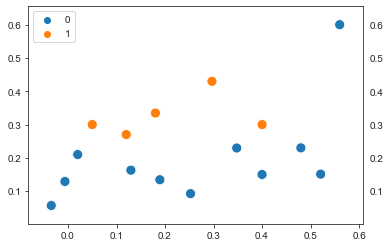

In [462]:
sns.scatterplot(x=x2_1, y=y2_1, hue=l2_1, s=100)


In [336]:
x2_2 = [np.random.choice([0.3, 0.4, 0.5, 0.6])+0.1*np.random.normal() for i in range(10)]
y2_2 = [i+0.1*np.random.normal() for i in np.linspace(0.2, 0.6, 10)]
l2_2 = [int(i<0.55) for i in x2_2]

In [431]:
x2_1.append(0.12)
y2_1.append(0.27)
l2_1.append(1)

(0, 0.75)

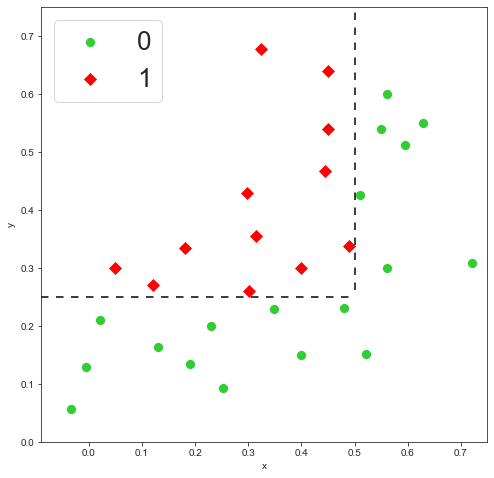

In [436]:
plt.figure(figsize=(8,8))
df2_1 = pd.DataFrame(data={'x':x2_1, 'y':y2_1, 'label':l2_1})
df2_2 = pd.DataFrame(data={'x':x2_2, 'y':y2_2, 'label':l2_2})
df_2 = df2_1.append(df2_2)

colors=['limegreen', 'red']
markers = ['o', 'D']

for i in range(2):
#     sns.scatterplot(x=df_2[df_2['label']==i]['x'], y=df_2[df2['label']==i]['y'], hue=df_2['label'], s=100)
    sns.scatterplot(x=df_2[df_2['label']==i]['x'], y=df_2[df_2['label']==i]['y'], color=colors[i], marker=markers[i], s=100)
    

plt.legend(['0', '1'], prop={'size': 26})

ax2 = sns.lineplot([-0.09, 0.5], [0.25, 0.25], color='black')
plt.axvline(x=0.5, ymin=0.35, ymax=2, linestyle=(0, (5, 5)), color='black')

ax2.lines[0].set_linestyle((0, (5, 5)))

plt.xlim(-0.09, 0.75)
plt.ylim(0, 0.75)

# Fit model

In [438]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['label'], axis=1), df['label'], test_size=0.33, random_state=42)

In [439]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df2.drop(['label'], axis=1), df2['label'], test_size=0.33, random_state=42)

In [440]:
xgb_model = xgb.XGBClassifier()

In [441]:
xgb_model.fit(X_train2, y_train2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [442]:
xgb_model.score(X_test2, y_test2)

1.0

In [443]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_model.score(X_test, y_test)

/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1.0

In [444]:
xgb_explainer = shap.TreeExplainer(rf_model)
xgb_shap_values = xgb_explainer.shap_values(X_test)

shap_imps = []
transposed_shap = [*zip(*xgb_shap_values[0])]
for idx, col in enumerate(transposed_shap):
    shap_imps.append(np.mean(list(map(lambda x: abs(x), col))))


abs_importances = list(map(abs, shap_imps))
total_importance = (sum(abs_importances))
importance_shares = list(map(lambda x: x/total_importance, abs_importances))

In [448]:
importance_shares

[0.44703443617976285, 0.5529655638202372]

[0.268,
 0.29600000000000004,
 0.32399999999999995,
 0.3320000000000001,
 0.348,
 0.32400000000000007,
 0.3560000000000001,
 0.384,
 0.45999999999999996,
 0.392]

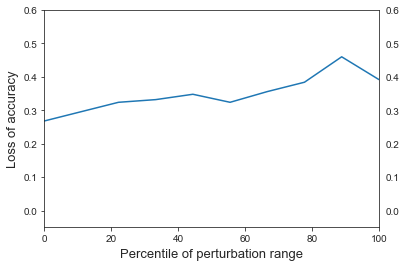

In [464]:
examine_interpretation(rf_model, X_test.iloc[:50], y_test[:50], importance_shares, epsilon=0.5)

[0.07200000000000006,
 0.11199999999999988,
 0.21599999999999997,
 0.33999999999999986,
 0.348,
 0.384,
 0.44399999999999995,
 0.42799999999999994,
 0.48,
 0.48]

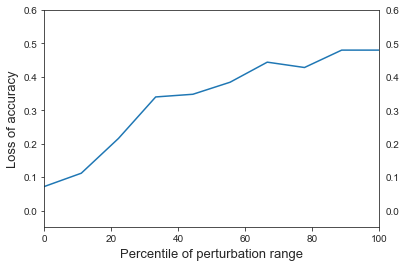

In [465]:
examine_local_fidelity(rf_model, X_test.iloc[:50], y_test[:50], epsilon=0.5, framework='lime')

In [156]:
x3 = 0.1*np.random.normal(size=1000)+1000.5
y3 = np.random.random(1000)
l3 = [int(j>(i-1000)) for i, j in zip(x3, y3)]
df3 = pd.DataFrame(data={'x':x3, 'y':y3, 'label':l3})


In [158]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df3.drop(['label'], axis=1), df3['label'], test_size=0.33, random_state=42)

logreg = LogisticRegression()

logreg.fit(X_train1, y_train1)
logreg.score(X_test1, y_test1)

/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9424242424242424

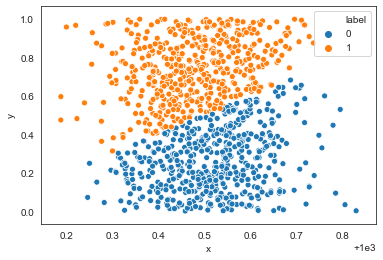

In [157]:
sns.scatterplot(df3['x'], df3['y'], hue='label', data=df3, cmap='bright')

# Permutation importances

In [206]:
perm = PermutationImportance(rf_model).fit(X_test, y_test)
eli5.show_weights(perm)

Weight,Feature
0.3545 ± 0.0364,x1
0.2606 ± 0.0485,x0


In [207]:
perm_imps = perm.feature_importances_

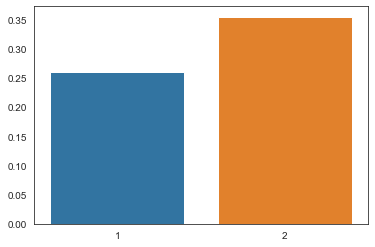

In [208]:
sns.barplot(x=[1,2], y=perm_imps)

[0.036363636363636376,
 0.28787878787878796,
 0.36969696969696975,
 0.3939393939393939,
 0.4757575757575758,
 0.49090909090909096,
 0.49696969696969695,
 0.4606060606060607,
 0.4878787878787879,
 0.5060606060606061]

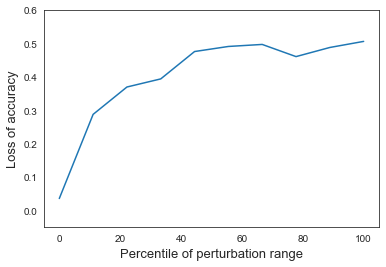

In [220]:
examine_local_fidelity(rf_model, X_test, y_test, epsilon=1)

[0.0,
 0.024242424242424176,
 0.0454545454545453,
 0.06666666666666665,
 0.06363636363636371,
 0.08484848484848473,
 0.08787878787878789,
 0.08787878787878789,
 0.09090909090909105,
 0.11212121212121207]

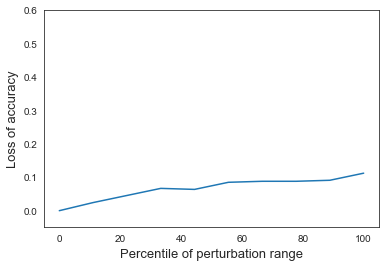

In [210]:
examine_local_fidelity(rf_model, X_test.iloc[:150], y_test[:150], from_zero=True)

[0.0,
 0.12727272727272732,
 0.20303030303030312,
 0.24848484848484842,
 0.23030303030303045,
 0.24242424242424243,
 0.23636363636363633,
 0.27575757575757576,
 0.25454545454545463,
 0.24848484848484864]

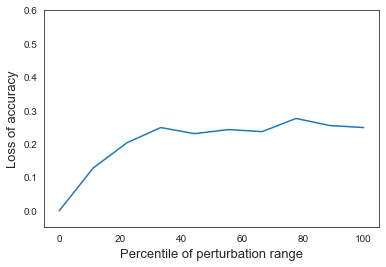

In [217]:
examine_interpretation(rf_model, X_test, y_test, perm_imps, epsilon=1, from_zero=True)

[0.0,
 0.23757575757575755,
 0.2793939393939394,
 0.31272727272727274,
 0.3242424242424242,
 0.3278787878787879,
 0.33696969696969703,
 0.3412121212121212,
 0.3533333333333333,
 0.34424242424242424]

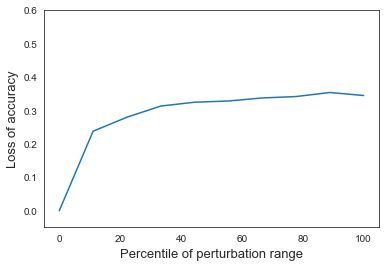

In [189]:
examine_interpretation(rf_model, X_test, y_test, perm_imps, from_zero=True)

[0.2848484848484849,
 0.29393939393939394,
 0.396969696969697,
 0.3787878787878788,
 0.45151515151515154,
 0.44545454545454555,
 0.4606060606060607,
 0.49696969696969695,
 0.42727272727272736,
 0.4545454545454546]

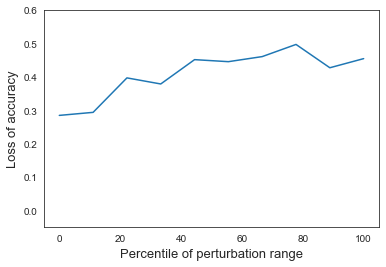

In [218]:
examine_interpretation(rf_model, X_test, y_test, perm_imps, epsilon=1)

[0.35969696969696974,
 0.4700000000000001,
 0.4884848484848485,
 0.49303030303030293,
 0.49242424242424243,
 0.47757575757575754,
 0.487878787878788,
 0.49303030303030293,
 0.4966666666666667,
 0.49484848484848487]

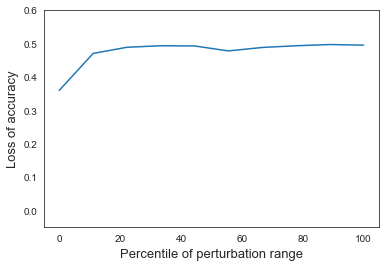

In [190]:
examine_interpretation(rf_model, X_test, y_test, importance_shares)